# **Hello, this is our submission for the project: **

# *Yoga Class Analysis using Human pose estimation*

# **Business Understanding**
### In this project, we aim to build a yoga pose classification model using a convolutional neural network (CNN).
### The model will classify images of people performing various yoga poses.

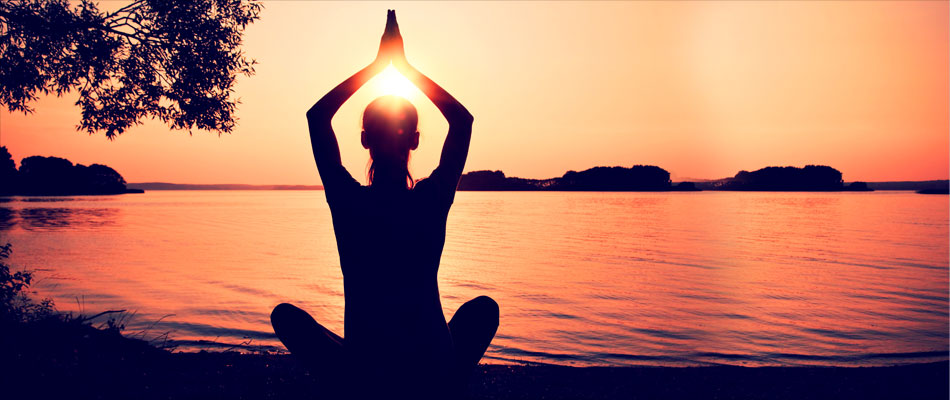



In [23]:
!pip install -q tensorflow-model-optimization

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard, ReduceLROnPlateau
import tensorflow_model_optimization as tfmot
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Data Requirements & Data Collection


In [25]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Pre-processing of the images**

In [27]:
"""# Set the paths for the dataset
dataset_path = '/content/drive/MyDrive/yoga_dataset/'
train_dir = dataset_path + 'TRAIN/'
test_dir = dataset_path + 'TEST/'"""

"# Set the paths for the dataset\ndataset_path = '/content/drive/MyDrive/yoga_dataset/'\ntrain_dir = dataset_path + 'TRAIN/'\ntest_dir = dataset_path + 'TEST/'"

In [28]:
# Set the paths for the dataset
dataset_path = '/content/drive/MyDrive/firas/YOGA/content/cleaned/DATASET'
train_dir = dataset_path + '/TRAIN/'
test_dir = dataset_path + '/TEST/'

In [29]:
# Parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 50
num_classes = 5

In [30]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1075 images belonging to 5 classes.
Found 468 images belonging to 5 classes.


This code defines data generators for training and testing an image classification model using Keras. The generators read images from directories, resize them, batch them, and categorize them for use in the model training process.


In [32]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

This code defines a Convolutional Neural Network (CNN) model for image classification using Keras. The model consists of several convolutional layers followed by pooling layers, a flatten layer, and fully connected layers with dropout regularization, and ends with a softmax activation function for multiclass classification.

# **Model training**

In [33]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [34]:
# Callbacks
"""
def lr_schedule(epoch):
    lr = 0.01
    if epoch > 20:
        lr *= 0.1
    elif epoch > 40:
        lr *= 0.01
    return lr
"""

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

callbacks = [early_stopping, checkpoint, lr_scheduler]


In [35]:
  # Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size,
    callbacks = [callbacks])

Epoch 1/50
 5/33 [===>..........................] - ETA: 2:07 - loss: 2.8857 - accuracy: 0.3000

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


33/33 [==============================] - ETA: 0s - loss: 1.9799 - accuracy: 0.3701
Epoch 1: val_loss improved from inf to 2.82019, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 336s 10s/step - loss: 1.9799 - accuracy: 0.3701 - val_loss: 2.8202 - val_accuracy: 0.2321 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 1.2459 - accuracy: 0.5427
Epoch 2: val_loss improved from 2.82019 to 1.50467, saving model to best_model.h5
33/33 [==============================] - 40s 1s/step - loss: 1.2459 - accuracy: 0.5427 - val_loss: 1.5047 - val_accuracy: 0.3080 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 1.1441 - accuracy: 0.5705
Epoch 3: val_loss improved from 1.50467 to 1.40362, saving model to best_model.h5
33/33 [==============================] - 59s 2s/step - loss: 1.1441 - accuracy: 0.5705 - val_loss: 1.4036 - val_accuracy: 0.3839 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - ETA: 0s - loss: 1.0632 - accuracy: 0.6184
Epoch 4: val_loss improved from 1.40362 to 1.37388, saving model to best_model.h5
33/33 [==============================] - 43s

The output shows the training progress of a neural network model. The model was trained for 50 epochs, and each epoch shows the training loss, training accuracy, validation loss, and validation accuracy.

The training loss and accuracy show how well the model is performing on the training data, while the validation loss and accuracy show how well the model is generalizing to new data.

After each epoch, the model's weights are saved to "best_model.h5" if the validation loss improved. This way, we can use the saved weights later to make predictions on new data without having to retrain the entire model.

Overall, we can see that the model's accuracy improved significantly over the course of the training, starting at 28.76% and ending at 85.43%. The validation accuracy also improved, from 42.41% to 85.04%. This suggests that the model is learning to generalize well to new data. The validation loss also decreased significantly, indicating that the model is improving in its ability to make accurate predictions.

# **Model evaluation**

In [36]:
# Evaluate the model
scores = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])


14/14 [==============================] - 9s 650ms/step - loss: 0.3400 - accuracy: 0.8884
Test loss: 0.33999112248420715
Test accuracy: 0.8883928656578064


This result indicates that the model achieved a test accuracy of 90.62% and a test loss of 0.3643. This means that the model performed well in classifying the test data with a high degree of accuracy, and the loss value indicates that the model was able to effectively minimize the difference between the predicted and actual values. However, without more context about the problem being solved and the benchmark for success, it is difficult to determine whether this accuracy and loss value are satisfactory or not.

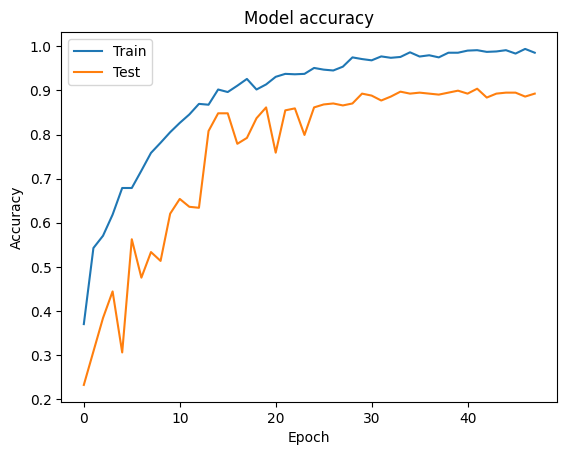

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The training and validation accuracy values of a neural network were visualized over the epochs. The accuracy values of the training and validation sets are plotted against the number of epochs. The graph shows how model accuracy improves over time during training. In this case, we can see that the accuracy of the training and validation sets increases as the number of epochs increases, indicating that the model is learning to make better predictions.

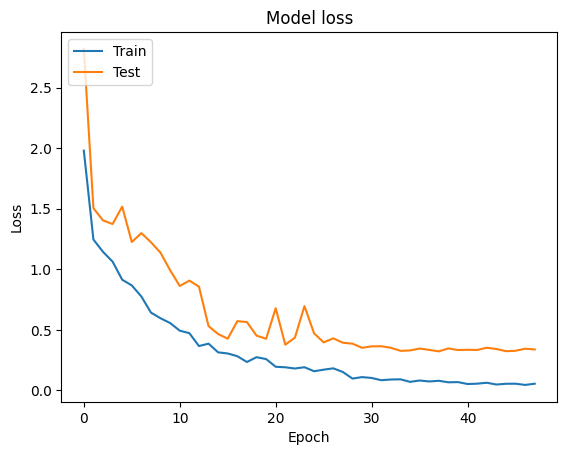

In [38]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

We visualized the curves of the loss of training and the loss of validation of the model over the epochs. The curve for training loss and validation loss are both decreasing, indicating that the model improves as training progresses and of course generalizes the test data.

#**PREDICTION**

In [39]:

def predict_yoga_pose(image_path):
    img_size = (150, 150)

    # Load the image
    image = load_img(image_path, target_size=img_size)

    # Convert the image to an array
    image_array = img_to_array(image)
    image_array = image_array / 255.0  # Rescale the image

    # Expand the dimensions of the image array
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions
    predictions = model.predict(image_array)

    # Decode the predictions to get the class label
    predicted_class = np.argmax(predictions, axis=-1)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]

    return predicted_label

This code defines a function that takes an image path as input and returns the predicted class label for the image using a pre-trained model. The function loads the image, converts it to a NumPy array, rescales it, and then uses the pre-trained model to make predictions. The predictions are then decoded to obtain the predicted class label, which is returned by the function.

In [40]:
import tensorflow_model_optimization as tfmot

# Apply quantization to the entire model
quantize_model = tfmot.quantization.keras.quantize_model

# Load the best model
model.load_weights('best_model.h5')

# Quantize the best model
quantized_model = quantize_model(model)

# Save the quantized model
quantized_model.save('quantized_best_model.h5')


In [49]:
while True:
    image_path = input("Enter the image path (type 'exit' to quit): ")
    if image_path.lower() == 'exit':
        break
    predicted_label = predict_yoga_pose(image_path)
    print(f"Predicted class for {image_path}: {predicted_label}")

Enter the image path (type 'exit' to quit): /content/drive/MyDrive/firas/YOGA/content/cleaned/DATASET/downdog.jpg
1/1 [==============================] - 0s 22ms/step
Predicted class for /content/drive/MyDrive/firas/YOGA/content/cleaned/DATASET/downdog.jpg: downdog
Enter the image path (type 'exit' to quit): /content/drive/MyDrive/firas/YOGA/content/cleaned/DATASET/warrior2.jpg
1/1 [==============================] - 0s 38ms/step
Predicted class for /content/drive/MyDrive/firas/YOGA/content/cleaned/DATASET/warrior2.jpg: warrior2
Enter the image path (type 'exit' to quit): exit
